# Exemplo de regressão

## Datasets do scikit learn

In [109]:
from sklearn.datasets import load_diabetes

#carregando o dataset
dataset = load_diabetes()

#informações do dicionário
dataset.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [110]:
#exibe a descrição do dataset e suas características
print(dataset.DESCR)
print(dataset.feature_names)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [115]:
#o dataset possui 442 amostras e 10 características e o resultado é um vetor com 442 resultados
X, y = dataset.data, dataset.target
X.shape, y.shape

((442, 10), (442,))

0


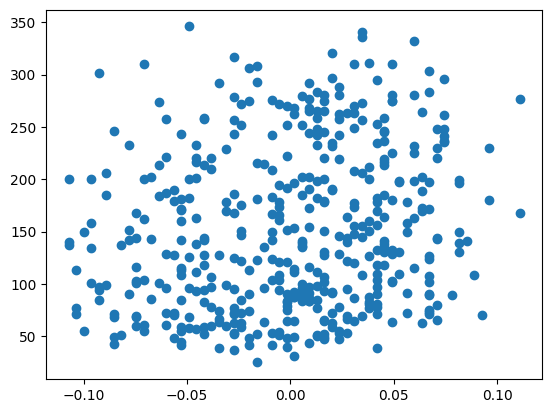

1


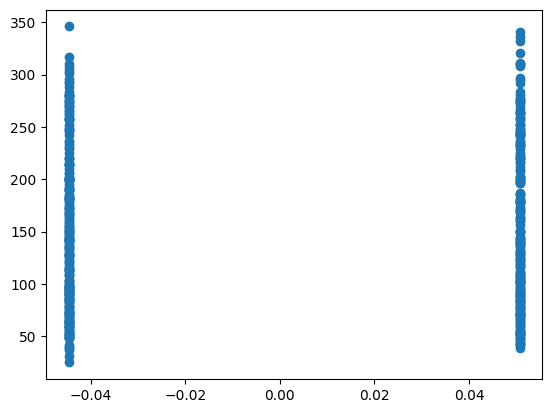

2


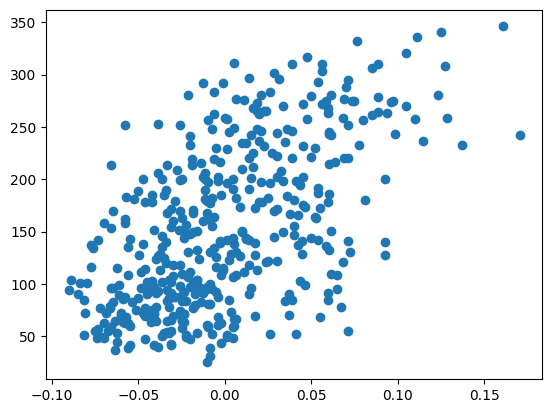

3


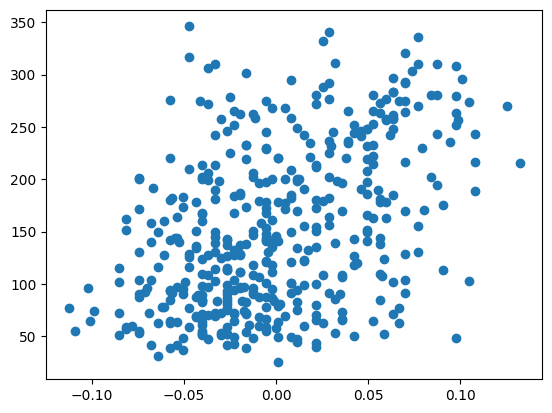

4


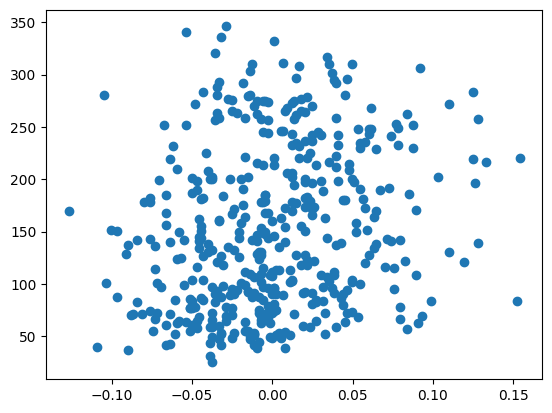

5


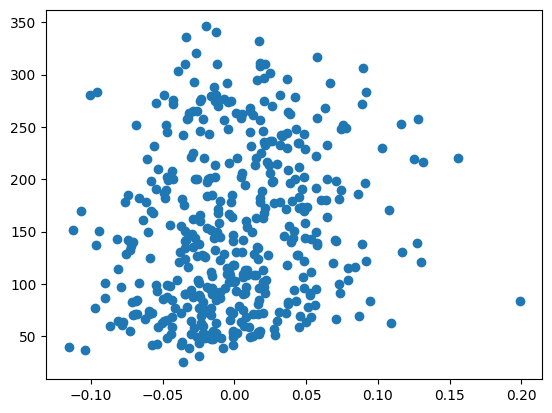

6


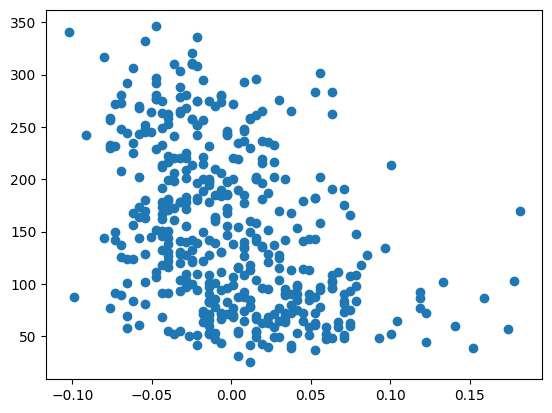

7


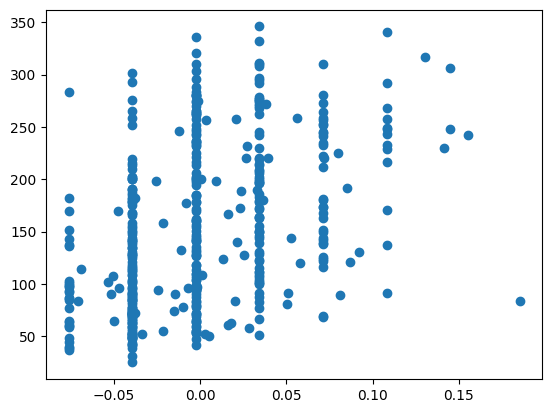

8


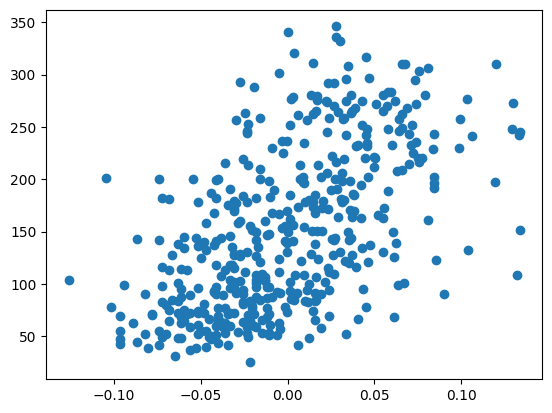

9


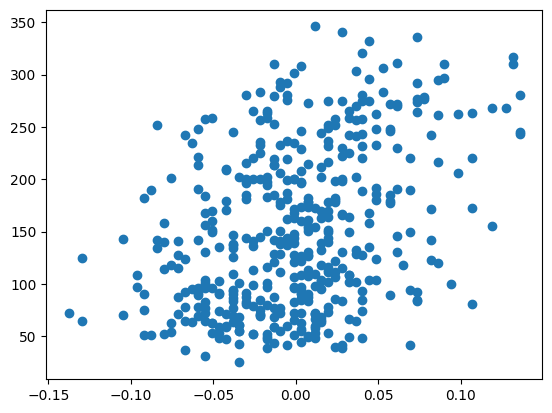

In [116]:
#visualizando como as características estão relacionadas com o resultado
import matplotlib.pylab as plt
for i in range(X.shape[1]):
  print(i)
  plt.scatter(X[:,i], y)
  plt.show()

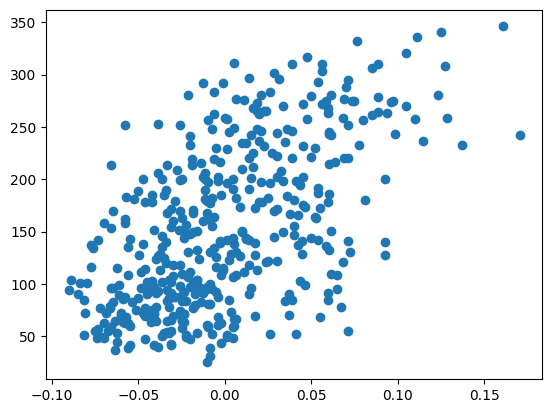

In [117]:
#isola a terceira característica (índice 2)
X2 = X[:,2:3]
plt.scatter(X2, y)
plt.show()

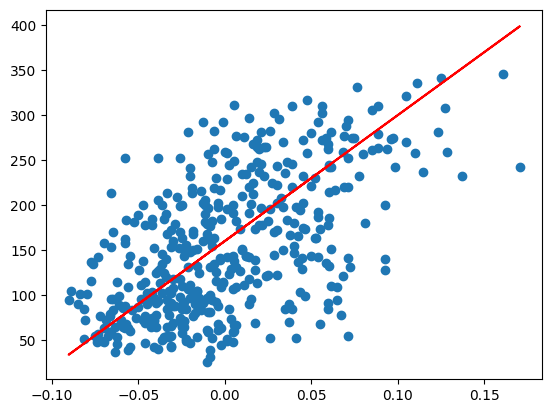

In [118]:
#definindo uma função de modelo linear
def modelo_linear(X, a, b):
  y = a*X + b
  return y

ypred = modelo_linear(X2, 1400, 160)
plt.scatter(X2, y)
plt.plot(X2, ypred, 'r')
plt.show()

## Métricas de Desempenho

In [119]:
#Erro Absoluto Médio - MAE
def mae(y, ypred):
  yDiff = ypred - y.reshape(-1,1)
  yAbs = abs(yDiff)
  errorSum = sum(yAbs)
  mae = errorSum/len(yAbs)
  return mae

ypred = modelo_linear(X2, 1400, 160)
mae(y, ypred)

array([53.34331859])

In [120]:
#Erro Quadrático Médio - MSE
def mse(y, ypred):
  yDiff = ypred - y.reshape(-1,1)
  yDiffSquare = yDiff**2
  errorSum = sum(yDiffSquare)
  mse = errorSum/len(yDiffSquare)
  return mse

ypred = modelo_linear(X2, 1400, 160)
mse(y, ypred)

array([4411.63409711])

In [121]:
#Raiz do Erro Quadrático Médio - RMSE
from math import sqrt
def rmse(y, ypred):
  yDiff = ypred - y.reshape(-1,1)
  yDiffSquare = yDiff**2
  errorSum = sum(yDiffSquare)
  mse = errorSum/len(yDiffSquare)
  return sqrt(mse)

ypred = modelo_linear(X2, 1400, 160)
rmse(y, ypred)

66.42013322114525

In [122]:
#importando a métrica do sckit-learn
from sklearn.metrics import mean_squared_error

def rmse(y, ypred):
  mse = mean_squared_error(y, ypred)
  return sqrt(mse)

ypred = modelo_linear(X2, 1400, 160)
rmse(y, ypred)

66.42013322114525

## Criando um modelo de aprendizado intuitivo

170.51240981363347
62.37352474510642


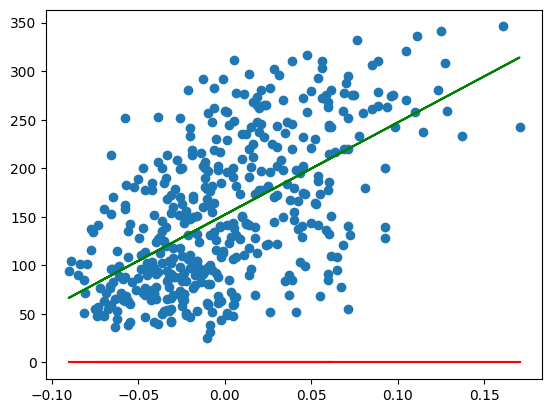

(949.423803514958, 152.13164836272784)

In [123]:
class regressao_linear():
  def __init__ (self):
    self.a = 0
    self.b = 0
  def fit(self, X, y):
    fatorAjuste = 1 / len(y)
    for _ in range(5000):
      ypred = self.predict(X)
      erro = ypred - y.reshape(-1,1)
      ajusteB = (sum(erro)/len(erro))
      self.b = self.b - fatorAjuste * ajusteB[0]
      ajusteA = sum([erro[i]*X[i] for i in range(X.shape[0])])
      self.a = self.a - fatorAjuste * ajusteA[0]
  def predict(self, X):
    y = self.a*X + self.b
    return y

plt.scatter(X2, y)
modelo = regressao_linear()
ypred = modelo.predict(X2)
print(rmse(y, ypred))
plt.plot(X2, ypred, 'r')

modelo.fit(X2, y)

ypred = modelo.predict(X2)
print(rmse(y, ypred))
plt.plot(X2, ypred, 'g')

plt.show()
modelo.a, modelo.b

## Implementação de um algoritmo de aprendizado usando notação vetorial

170.51240981363347
62.37352471809045


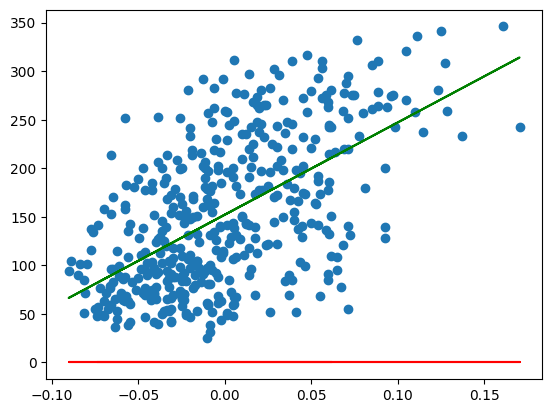

array([[152.13348416],
       [949.42380351]])

In [125]:
import numpy as np

class regressao_linear():
  def __init__ (self):
    self.w = np.zeros((2,1))

  @staticmethod
  def addBias(X):
    bias = np.ones((X.shape[0],1))
    X_b = np.concatenate((bias,X),axis=1)
    return X_b

  def fit(self, X, y):
    fatorAjuste = 1 / len(y)
    X_b = self.addBias(X)
    for _ in range(5000):
      ypred = X_b.dot(self.w)
      erros = ypred - y.reshape(-1, 1)
      ajuste = X_b.T.dot(erros)
      self.w = self.w - fatorAjuste * ajuste

  def predict(self, X):
    X_b = self.addBias(X)
    y = X_b.dot(self.w)
    return y

plt.scatter(X2, y)
modelo = regressao_linear()
ypred = modelo.predict(X2)
print(rmse(y, ypred))
plt.plot(X2, ypred, 'r')

modelo.fit(X2, y)

ypred = modelo.predict(X2)
print(rmse(y, ypred))
plt.plot(X2, ypred, 'g')

plt.show()
modelo.w

## Análise da função de erro

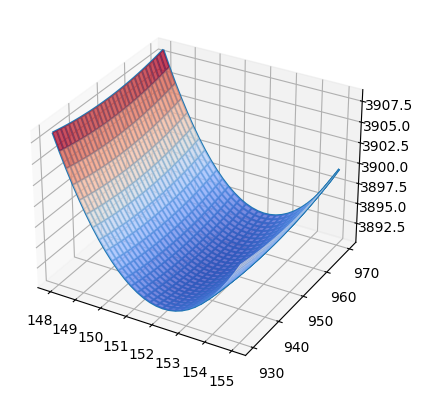

In [126]:
#visualização em 3D
w0 = np.linspace(148, 155, 30)
w1 = np.linspace(930, 970, 30)

def z_function(W0, W1):
  modelo = regressao_linear()
  Erro = np.empty(W0.shape)
  for j in range(Erro.shape[0]):
    for k in range(Erro.shape[1]):
      modelo.w[0] = W0[j][k]
      modelo.w[1] = W1[j][k]
      ypred = modelo.predict(X2)
      mse = mean_squared_error(y, ypred)
      Erro[j][k] = mse
  return Erro

ax = plt.axes(projection="3d")
W0, W1 = np.meshgrid(w0, w1)
Erro = z_function(W0, W1)

ax.plot_wireframe(W0, W1, Erro)
ax.plot_surface(W0, W1, Erro, rstride=1, cstride=1, alpha=0.75,
                cmap='coolwarm', edgecolor='none')

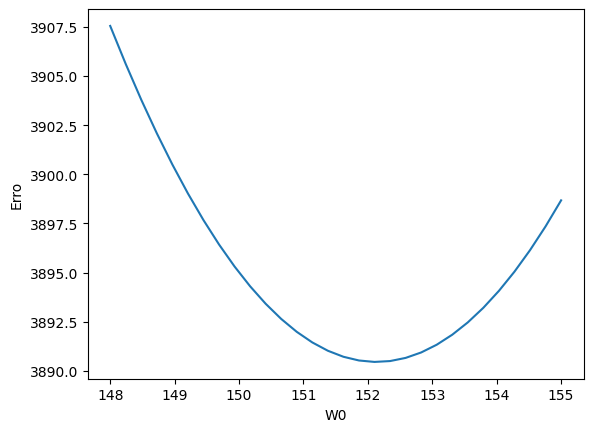

In [127]:
#visualização em 2D para o W0
plt.ylabel("Erro")
plt.xlabel("W0")
i = 15
plt.plot(W0[i,:],Erro[i,:])
plt.show()

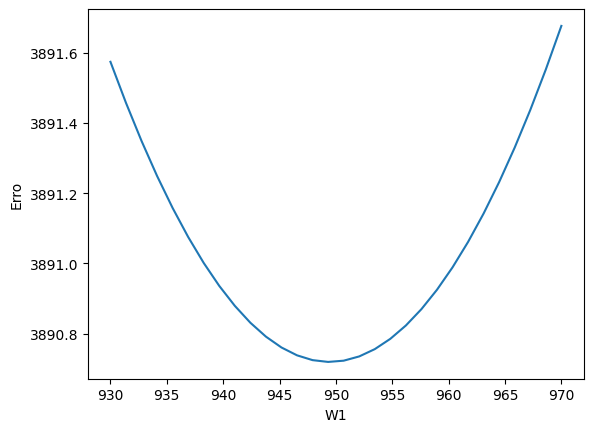

In [128]:
#visualização em 2D para o W1
plt.ylabel("Erro")
plt.xlabel("W1")
i = 15
plt.plot(W1[:,i],Erro[:,i])
plt.show()

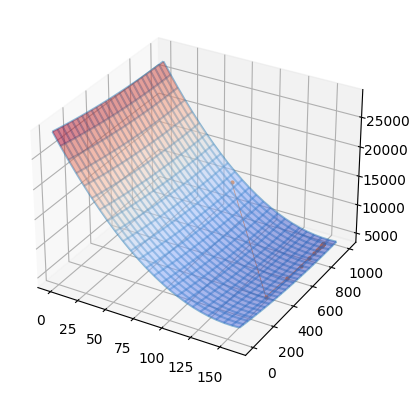

In [129]:
#visualização do histórico dos ajustes

#modificando o modelo
import numpy as np

class regressao_linear():
  def __init__ (self):
    self.w = np.zeros((2,1))
    self.wh = [] #adicionada variável para armazenar o histórico dos ajustes

  @staticmethod
  def addBias(X):
    bias = np.ones((X.shape[0],1))
    X_b = np.concatenate((bias,X),axis=1)
    return X_b

  def fit(self, X, y):
    fatorAjuste = 1 / len(y)
    X_b = self.addBias(X)
    for _ in range(5000):
      ypred = X_b.dot(self.w)
      erros = ypred - y.reshape(-1, 1)
      ajuste = X_b.T.dot(erros)
      self.w = self.w - fatorAjuste * ajuste
      #adicionando o histórico de ajuste
      mse = mean_squared_error(y, ypred)
      self.wh.append([self.w[0,0], self.w[1,0], mse])

  def predict(self, X):
    X_b = self.addBias(X)
    y = X_b.dot(self.w)
    return y

#visualização em 3D do histórico dos ajustes
w0 = np.linspace(0, 160, 25)
w1 = np.linspace(0, 1000, 25)

def z_function(W0, W1):
  modelo = regressao_linear()
  Erro = np.empty(W0.shape)
  for j in range(Erro.shape[0]):
    for k in range(Erro.shape[1]):
      modelo.w[0] = W0[j][k]
      modelo.w[1] = W1[j][k]
      ypred = modelo.predict(X2)
      mse = mean_squared_error(y, ypred)
      Erro[j][k] = mse
  return Erro

ax = plt.axes(projection="3d")
W0, W1 = np.meshgrid(w0, w1)
Erro = z_function(W0, W1)

ax.plot_wireframe(W0, W1, Erro, alpha=0.5)
ax.plot_surface(W0, W1, Erro, rstride=1, cstride=1, alpha=0.5,
                cmap='coolwarm', edgecolor='none')

modelo = regressao_linear()
modelo.fit(X2, y)
ypred = modelo.predict(X2)
wh = np.array(modelo.wh)
ax.plot(wh[::200,0],wh[::200,1],wh[::200,2], marker='o', linewidth='0.5', markersize=2)

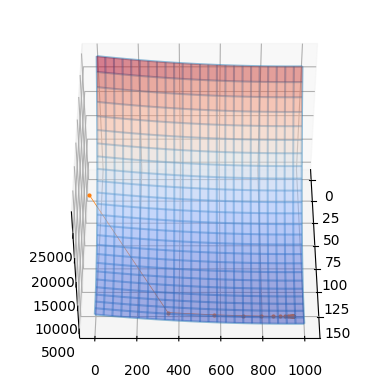

In [130]:
ax = plt.axes(projection="3d")
ax.plot_wireframe(W0, W1, Erro, alpha=0.5)
ax.plot_surface(W0, W1, Erro, rstride=1, cstride=1, alpha=0.5,
                cmap='coolwarm', edgecolor='none')

modelo = regressao_linear()
modelo.fit(X2, y)
ypred = modelo.predict(X2)
wh = np.array(modelo.wh)
ax.plot(wh[::200,0],wh[::200,1],wh[::200,2], marker='o', linewidth='0.5', markersize=2)
ax.view_init(azim=0, elev=45)

## Usando a classe LinearRegression do scikit-learn

In [132]:
#baseado na classe implementada
modelo = regressao_linear()
modelo.fit(X2, y)
ypred = modelo.predict(X2)
print(mean_squared_error(y, ypred))
print(modelo.w)

3890.45658575824
[[152.13348416]
 [949.42380351]]


In [133]:
#basedo na classe LinearRegression do scikit-learn
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(X2, y)
ypred = modelo.predict(X2)
print(mean_squared_error(y, ypred))
print(modelo.intercept_, modelo.coef_)

3890.456585461273
152.13348416289617 [949.43526038]


In [135]:
#utilizando LinearRegression para todas as características
modelo = LinearRegression()
modelo.fit(X, y)
ypred = modelo.predict(X)
print(mean_squared_error(y, ypred))
print(modelo.intercept_, modelo.coef_)

2859.69634758675
152.13348416289597 [ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]
